In [15]:
# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [20]:
import numpy as np
np.unique(faces.target)


array([0, 1])

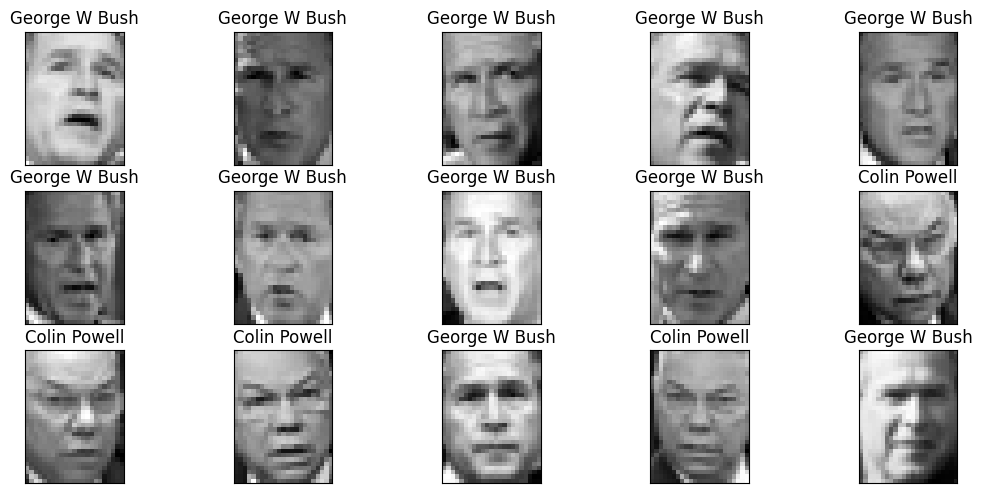

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())


In [24]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [25]:
y = faces.target
y.shape

(766,)

In [26]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [27]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                14280     
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = 'accuracy')

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20


2023-02-20 10:42:14.522986: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


36/36 [==============================] - 0s 489us/step - loss: 0.5226 - accuracy: 0.7178
Epoch 2/20
36/36 [==============================] - 0s 427us/step - loss: 0.3339 - accuracy: 0.8415
Epoch 3/20
36/36 [==============================] - 0s 419us/step - loss: 0.2372 - accuracy: 0.9216
Epoch 4/20
36/36 [==============================] - 0s 429us/step - loss: 0.1856 - accuracy: 0.9408
Epoch 5/20
36/36 [==============================] - 0s 435us/step - loss: 0.1229 - accuracy: 0.9756
Epoch 6/20
36/36 [==============================] - 0s 433us/step - loss: 0.0824 - accuracy: 0.9895
Epoch 7/20
36/36 [==============================] - 0s 438us/step - loss: 0.0562 - accuracy: 0.9930
Epoch 8/20
36/36 [==============================] - 0s 440us/step - loss: 0.0462 - accuracy: 0.9930
Epoch 9/20
36/36 [==============================] - 0s 432us/step - loss: 0.0344 - accuracy: 0.9930
Epoch 10/20
36/36 [==============================] - 0s 425us/step - loss: 0.0270 - accuracy: 0.9965
Epoch 11/2

In [30]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

6/6 [==============================] - 0s 590us/step - loss: 0.3032 - accuracy: 0.9375


[0.30317556858062744, 0.9375]

In [31]:
pd.Series(y).value_counts()

1    530
0    236
dtype: int64

In [32]:
# Baseline score
530 / (530+236)

0.6919060052219321

In [33]:
# Predicted probabilities
model.predict(scaler.transform(X_test))

6/6 [==============================] - 0s 578us/step


array([[9.99975264e-01],
       [2.11103737e-01],
       [9.98757541e-01],
       [4.53985808e-03],
       [1.79197255e-03],
       [9.99905407e-01],
       [3.82352062e-02],
       [9.99979496e-01],
       [6.50638191e-04],
       [9.99980748e-01],
       [9.97313976e-01],
       [9.99999821e-01],
       [1.32653641e-03],
       [9.99999940e-01],
       [8.05192530e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998331e-01],
       [1.00000000e+00],
       [9.99991894e-01],
       [9.94984329e-01],
       [9.99999046e-01],
       [9.99999344e-01],
       [9.60515916e-01],
       [1.00000000e+00],
       [9.99997199e-01],
       [9.99888659e-01],
       [1.38071328e-01],
       [9.99584198e-01],
       [9.98764813e-01],
       [2.42393725e-02],
       [9.14760351e-01],
       [9.99999881e-01],
       [1.80583764e-02],
       [9.95383203e-01],
       [2.10101437e-02],
       [9.99999881e-01],
       [9.95238602e-01],
       [3.39731872e-02],
       [7.98811793e-01],
